In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import os

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
!unzip /content/car_license_plate.v1i.yolov8.zip -d /content/dataset/

Archive:  /content/car_license_plate.v1i.yolov8.zip
replace /content/dataset/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
 extracting: /content/dataset/data.yaml  


# Setting up File paths

In [21]:
train_imgs = sorted(glob('/content/dataset/train/images/*.jpg'))[:8]

print("Found images:", len(train_imgs))

# Optional: confirm they exist
for img_path in train_imgs:
    if not os.path.exists(img_path):
        print(f"⚠️ Not Found: {img_path}")

before_dir = '/content/inference_results/before_training'
after_dir = '/content/inference_results/after_training'
os.makedirs(before_dir, exist_ok=True)
os.makedirs(after_dir, exist_ok=True)

Found images: 8


# **Loading pre-trained YOLOv8s model**
("device=0" tries to use GPU)

In [16]:
model = YOLO('yolov8s.pt')

# Run inference BEFORE training

In [19]:
print("-----Running inference before training...")
results_before = model.predict(source=train_imgs, save=True, save_txt=False, device=0, project=before_dir, name='preds')
print("✅ Saved BEFORE training predictions.")

-----Running inference before training...

0: 640x640 1 car, 12.6ms
1: 640x640 1 oven, 12.6ms
2: 640x640 9 cars, 12.6ms
3: 640x640 4 cars, 12.6ms
4: 640x640 (no detections), 12.6ms
5: 640x640 2 cars, 12.6ms
6: 640x640 1 car, 12.6ms
7: 640x640 1 keyboard, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/inference_results/before_training/preds2
✅ Saved BEFORE training predictions.


# Training model on our dataset


In [20]:
# Train model
print("🚀 Training model...")
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    device=0,
    patience=5,
    pretrained=True,
    name='car-plate-detector_by_HammadAshrafDev'
)

🚀 Training model...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=car-plate-detector_by_HammadAshrafDev3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=

train: Scanning /content/dataset/train/labels.cache... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 333.3±132.2 MB/s, size: 20.3 KB)


val: Scanning /content/dataset/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]


Plotting labels to runs/detect/car-plate-detector_by_HammadAshrafDev3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/car-plate-detector_by_HammadAshrafDev3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.24G      3.226      4.544      2.329          4        640: 100%|██████████| 14/14 [00:05<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60         64    0.00106      0.297    0.00122   0.000454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.75G      1.847      2.759      1.455          3        640: 100%|██████████| 14/14 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         60         64      0.649      0.317      0.315      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.75G      1.707      2.227      1.326          4        640: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         60         64      0.794      0.375      0.413      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.75G      1.587      1.968      1.263          8        640: 100%|██████████| 14/14 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         60         64      0.502      0.379      0.388      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.75G      1.541      1.677      1.281          2        640: 100%|██████████| 14/14 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         60         64      0.756      0.578      0.662      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.75G      1.578      1.736      1.257          5        640: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         60         64      0.884      0.609      0.757      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.75G      1.516      1.564      1.275          6        640: 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         60         64       0.68      0.734       0.67      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.75G      1.524      1.433      1.264          9        640: 100%|██████████| 14/14 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         60         64      0.864      0.719      0.819      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.75G      1.447       1.35      1.176          3        640: 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60         64        0.8      0.844      0.865      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.75G      1.451      1.253      1.228          3        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         60         64       0.77      0.781      0.816       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.75G      1.414       1.18      1.201          2        640: 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         60         64      0.835      0.766      0.855      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.75G      1.383      1.083       1.16          4        640: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         60         64      0.781      0.766      0.811      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.75G      1.421      1.135      1.186          4        640: 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         60         64      0.892      0.781      0.885      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.75G      1.352      1.054       1.13          7        640: 100%|██████████| 14/14 [00:04<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60         64       0.84       0.74      0.788      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.75G      1.379      1.065      1.163          5        640: 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         60         64      0.869      0.781       0.86      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.76G      1.362     0.9981      1.134          7        640: 100%|██████████| 14/14 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         60         64      0.779       0.88      0.883      0.469
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



16 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/car-plate-detector_by_HammadAshrafDev3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/car-plate-detector_by_HammadAshrafDev3/weights/best.pt, 22.5MB

Validating runs/detect/car-plate-detector_by_HammadAshrafDev3/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


                   all         60         64      0.834      0.766      0.856      0.508
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/car-plate-detector_by_HammadAshrafDev3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cdc3b891fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Load best model after training

In [22]:
trained_model_path = 'runs/detect/car-plate-detector_by_HammadAshrafDev/weights/best.pt'
trained_model = YOLO(trained_model_path)

# Run inference AFTER training

In [23]:
print("-----Running inference after training...")
results_after = trained_model.predict(source=train_imgs, save=True, save_txt=False, device=0, project=after_dir, name='preds')
print("✅ Saved AFTER training predictions.")

-----Running inference after training...

0: 640x640 4 licences, 12.4ms
1: 640x640 5 licences, 12.4ms
2: 640x640 2 licences, 12.4ms
3: 640x640 2 licences, 12.4ms
4: 640x640 20 licences, 12.4ms
5: 640x640 1 licence, 12.4ms
6: 640x640 1 licence, 12.4ms
7: 640x640 23 licences, 12.4ms
Speed: 2.4ms preprocess, 12.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/inference_results/after_training/preds
✅ Saved AFTER training predictions.


# **Evaluating on validation set**

In [24]:
metrics = model.val()
print("Validation Results:", metrics)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 844.5±341.8 MB/s, size: 17.6 KB)


val: Scanning /content/dataset/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.43it/s]


                   all         60         64      0.857      0.734      0.837      0.509
Speed: 0.2ms preprocess, 13.2ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/car-plate-detector_by_HammadAshrafDev32
Validation Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cdb23ad6290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.0

# **To Run inference on multiple test images**

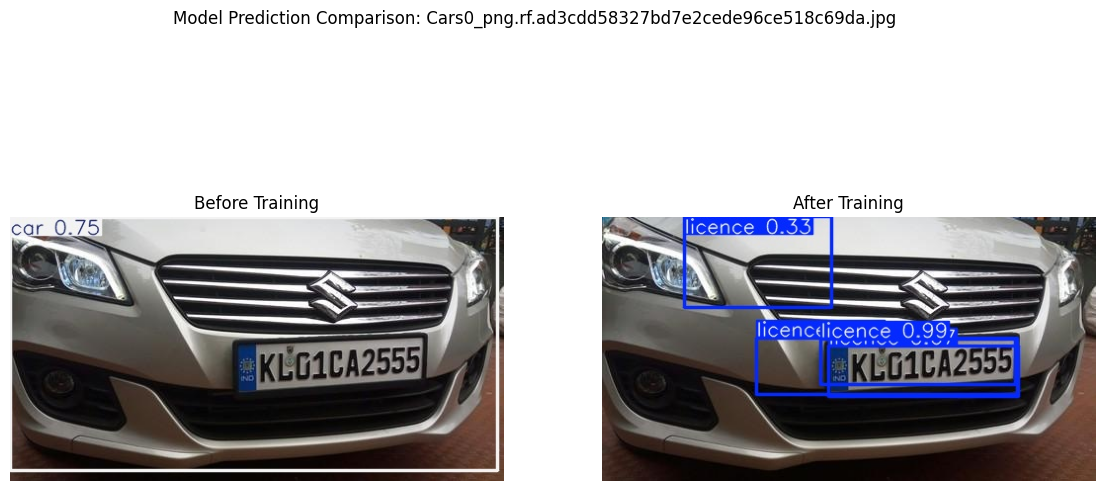

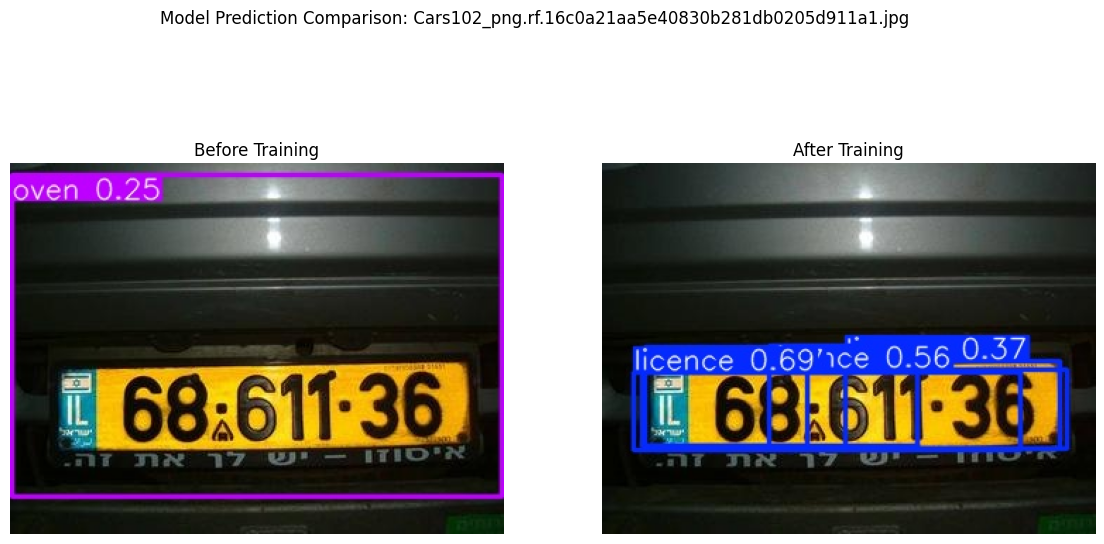

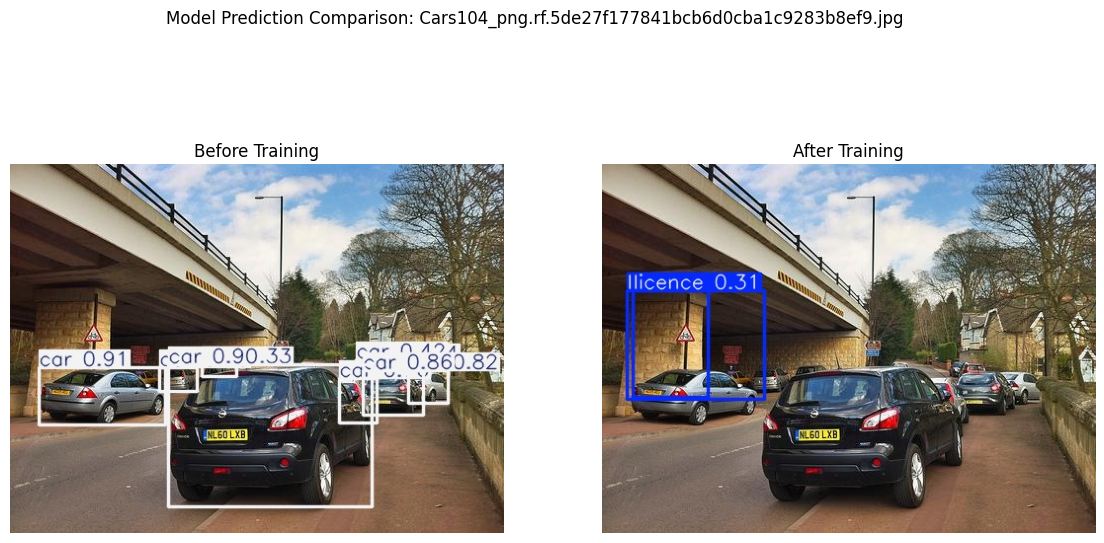

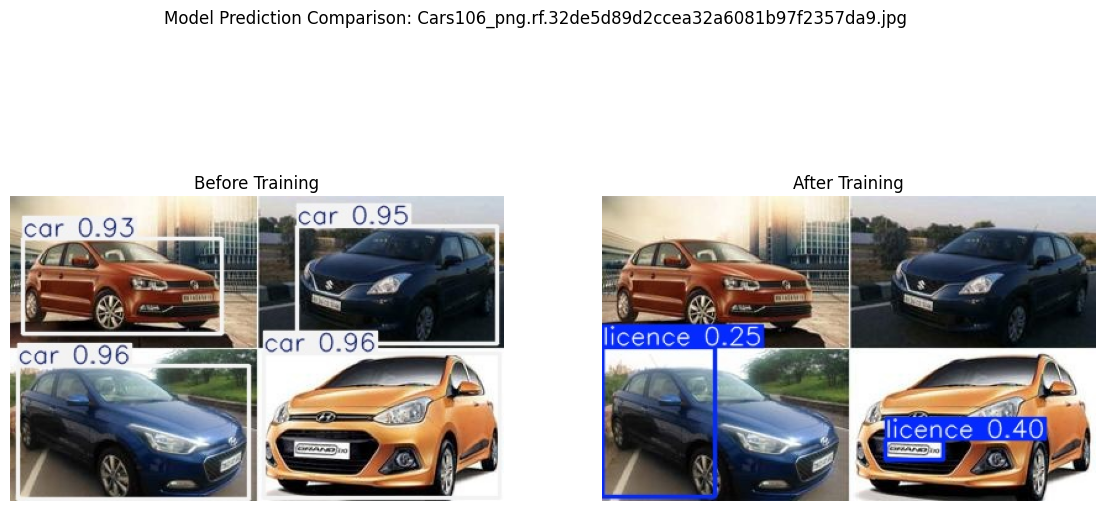

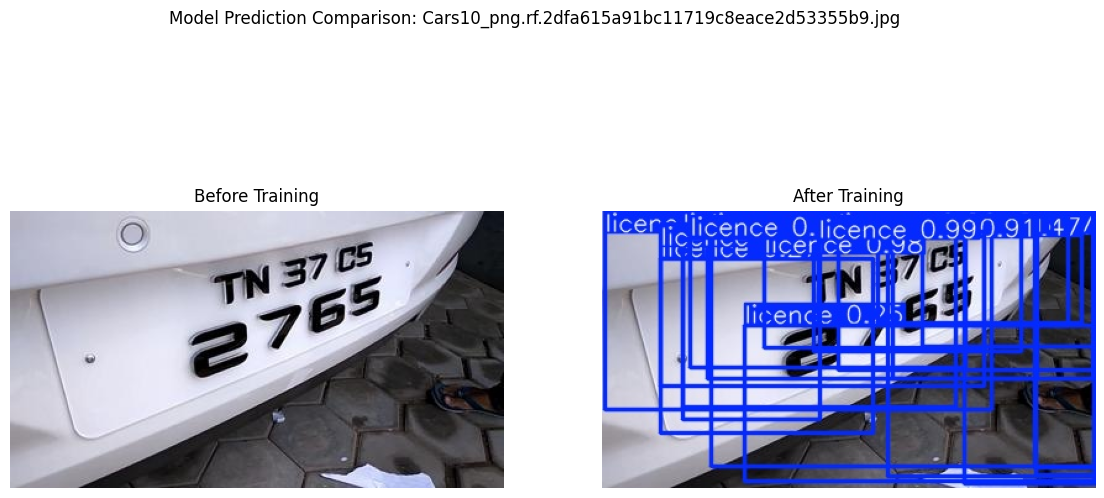

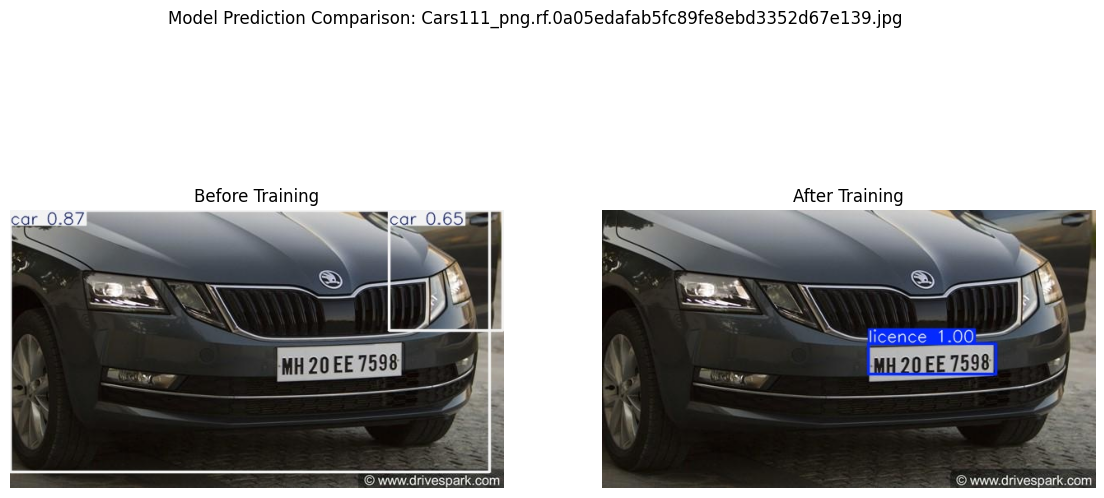

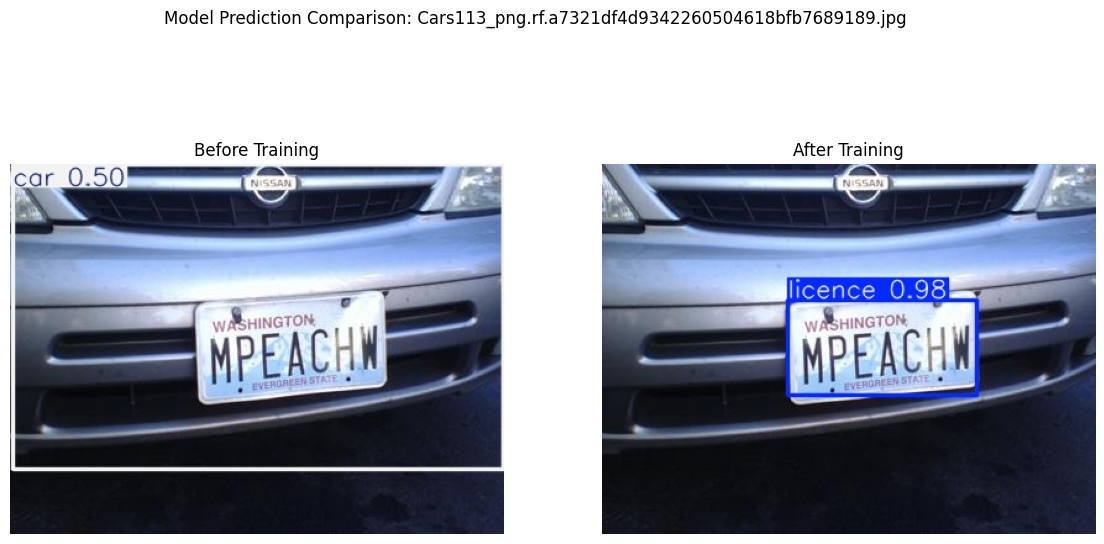

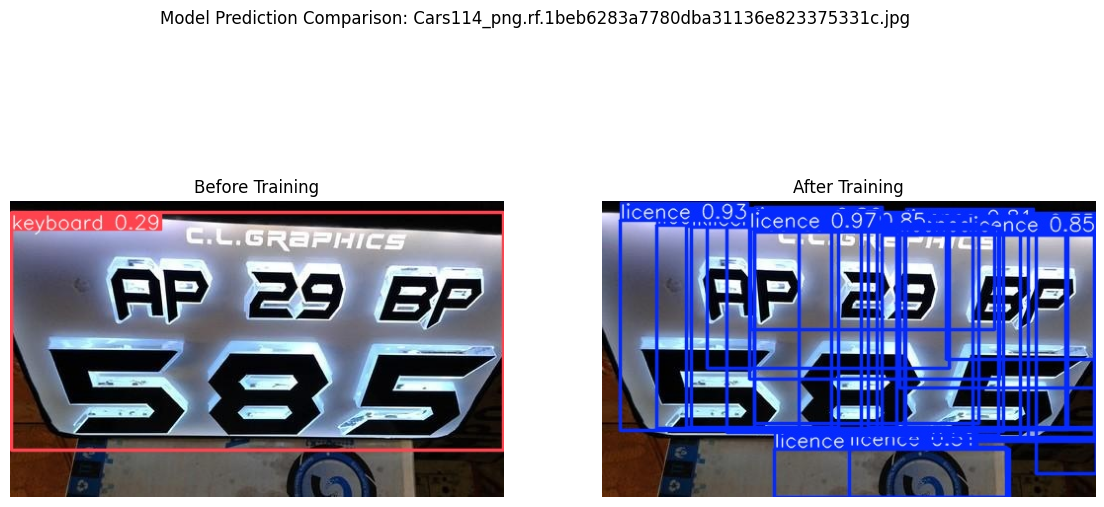

In [38]:
# Displaying sample predictions (before vs after)
for i in range(len(train_imgs)):
    before_img = f"{before_dir}/preds2/{os.path.basename(train_imgs[i])}"
    after_img = f"{after_dir}/preds/{os.path.basename(train_imgs[i])}"

    if os.path.exists(before_img) and os.path.exists(after_img):
        img1 = Image.open(before_img)
        img2 = Image.open(after_img)

        fig, axs = plt.subplots(1, 2, figsize=(14, 7))
        axs[0].imshow(img1)
        axs[0].set_title("Before Training")
        axs[0].axis('off')

        axs[1].imshow(img2)
        axs[1].set_title("After Training")
        axs[1].axis('off')

        plt.suptitle(f"Model Prediction Comparison: {os.path.basename(train_imgs[i])}")
        plt.show()


# **Exporting trained model to multiple formats**

In [29]:
best_model_path = model.ckpt_path if hasattr(model, 'ckpt_path') else f'runs/detect/car-plate-detector_by_HammadAshrafDev/weights/best.pt'
trained_model = YOLO(best_model_path)

trained_model.export(format='onnx')
trained_model.export(format='torchscript')
trained_model.export(format='tflite')

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8s summary (fused): 72 layers, 11,156,544 parameters, 0 gradients, 28.6 GFLOPs

PyTorch: starting from 'yolov8s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 7.5s, saved as 'yolov8s.onnx' (42.8 MB)

Export complete (9.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolov8s.onnx imgsz=640  
Validate:        yolo val task=

100%|██████████| 1.11M/1.11M [00:00<00:00, 33.0MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 51.29file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.58...
ONNX: export success ✅ 1.7s, saved as 'yolov8s.onnx' (42.9 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.0...
Saved artifact at 'yolov8s_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 84, 8400), dtype=tf.float32, name=None)
Captures:
  137284074412304: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  137284074411920: TensorSpec(shape=(3, 3, 3, 32), dtype=tf.float32, name=None)
  137284074412688: TensorSpec(shape=(32,), dtype=tf.float32, name=None)
  137284074416720: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  137284074416336: TensorSpec(shape=(3, 3, 32, 64), dtype=tf.float32, name=None)
  137284074417296: TensorSpec(shape=(64,), dtype=tf.float32, name=None)
  137284074414032: TensorSpec(shape=(1, 1, 64, 64), dtype=tf.float32, name=None)
  13728

'yolov8s_saved_model/yolov8s_float32.tflite'

# **Automatically download the exported models**
(Run this cell as well and leave colab running)

In [30]:

from google.colab import files

export_formats = ['onnx', 'torchscript', 'tflite']
for fmt in export_formats:
    file_path = f'runs/detect/car-plate-detector_by_HammadAshrafDev/weights/best.{fmt}'
    if os.path.exists(file_path):
        files.download(file_path)

In [34]:
!zip -r /content/inference_results/after_training.zip /content/inference_results/after_training/
!zip -r /content/inference_results/before_training.zip /content/inference_results/before_training/


updating: content/inference_results/after_training/ (stored 0%)
updating: content/inference_results/after_training/preds/ (stored 0%)
updating: content/inference_results/after_training/preds/Cars114_png.rf.1beb6283a7780dba31136e823375331c.jpg (deflated 2%)
updating: content/inference_results/after_training/preds/Cars106_png.rf.32de5d89d2ccea32a6081b97f2357da9.jpg (deflated 4%)
updating: content/inference_results/after_training/preds/Cars104_png.rf.5de27f177841bcb6d0cba1c9283b8ef9.jpg (deflated 5%)
updating: content/inference_results/after_training/preds/Cars113_png.rf.a7321df4d9342260504618bfb7689189.jpg (deflated 4%)
updating: content/inference_results/after_training/preds/Cars10_png.rf.2dfa615a91bc11719c8eace2d53355b9.jpg (deflated 2%)
updating: content/inference_results/after_training/preds/Cars111_png.rf.0a05edafab5fc89fe8ebd3352d67e139.jpg (deflated 5%)
updating: content/inference_results/after_training/preds/Cars0_png.rf.ad3cdd58327bd7e2cede96ce518c69da.jpg (deflated 4%)
updating